# Introduction
Regression is one of the most important machine learning techniques. It is mainly used for identifying the relationship between two or more variables and for predicting a continuous variable. 

A particular dataset contains a response variable and a set of explanatory variables, where the explanatory variables are said to be the features of the response variable. Regression modeling is used to estimate the relationship between the variables and predict the value of response variable by finding a line of best fit that minimizes the Residual Sum of Squares (RSS) i.e. the difference between the actual value and predicted value. 

In this analysis, we will first build a simple and a multiple regression model using python library scikit learn and then use the Gradient Descent Algorithm, an optimization technique, to find the minimum of the function RSS. 

We must always remember that our results are based on the quantity and quality of the available dataset. 

# Exploratory Data Analysis

In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from math import sqrt

In [2]:
# Load Dataset
df_house = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [3]:
# View the dataset
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Total Rows and Columns
df_house.shape

(21613, 21)

In [5]:
# Checking Datatypes
df_house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Dropping Variable 

There are some varibales such as ID and date which are irrelevant in predicting the value of the house. Therefore,before proceeding further we will drop these variables.

In [6]:
df_house = df_house.drop(['id','date'],axis =1)
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Missing Values

Before moving further with analysis it is important to check if there are any missing values in the dataset. As we can see from the code below, there are no missing values in the dataset. 

In [7]:
df_house.isnull().sum().sort_values(ascending = False)

sqft_lot15       0
condition        0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_living15    0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
price            0
dtype: int64

# Univariate Analysis

To get an overview of the distribution of the response or dependent variable "price", we will plot a normal distribution curve which will tell us the skewness, and spread of the data. 

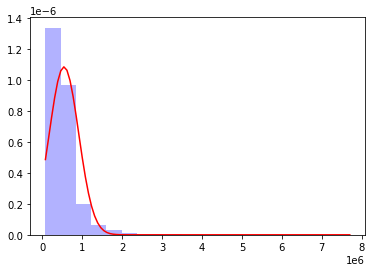

In [8]:
min_ = min(df_house['price'])
max_ = max(df_house['price'])
x = np.linspace(min_,max_,100)
mean = np.mean(df_house['price'])
std = np.std(df_house['price'])

# For Histogram
plt.hist(df_house['price'], bins=20, density=True, alpha=0.3, color='b')
y = norm.pdf(x,mean,std)

# For normal curve
plt.plot(x,y, color='red')


plt.show()

As we can see from the above graph, that the variable 'price' is skewed towards the right. 

In [9]:
df_house['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

### Boxplot

The boxplot provides a visual summary of the following items in a data:
1. Inter Quartile Rande (IQR)
2. Median
3. Whiskers
4. Outliers

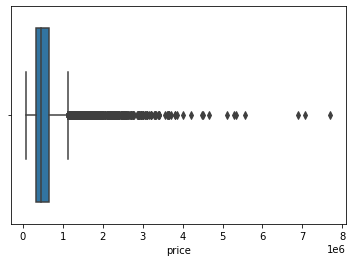

In [10]:
sns.boxplot(df_house['price'])

The boxplot shows that there are some suspected outliers in the dataset. 

# Correlation Matrix

The correlation coefficient shows the relationship or association between the dependent variable and independent variable. The value of the coefficient is between -1 and 1. 

**Positive Correlation** - Positive Correlation lies between 0 and 1, where a value close to 1 represents a strong positive correlation and a value close to 0 represents a weak positive correlation. 

**Negative Correlation** - Negative Correlation lies between -1 and 0, where a value close to -1 represents a strong negative correlation and a value close to 0 represents a weak negative correlation. 

However, we must always remember that correlation does not imply causation.

In [11]:
correlation_matrix = df_house.corr()
print(correlation_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

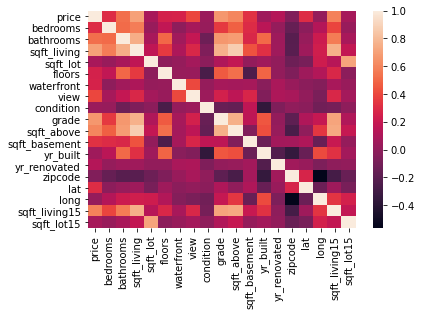

In [12]:
sns.heatmap(correlation_matrix)

By looking at the value of correlation coefficients from above, we can see identify variables that have a strong (+ve or -ve) relationship with the variable 'price'. These are 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 'sqft_basement'.

# Multivariate Analysis

Text(0.5, 1.0, 'Sqft_Living Vs Price')

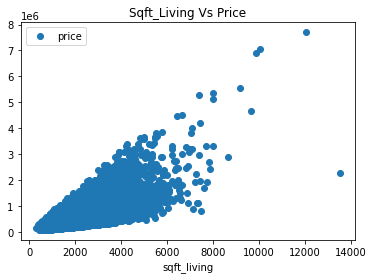

In [13]:
# Price & Sqft Living
df_house.plot(x='sqft_living',y='price',style = 'o')
plt.title('Sqft_Living Vs Price')

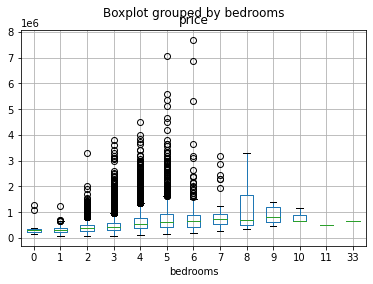

In [14]:
df_house.boxplot(column = ['price'],by='bedrooms')

Text(0.5, 1.0, 'lat Vs Price')

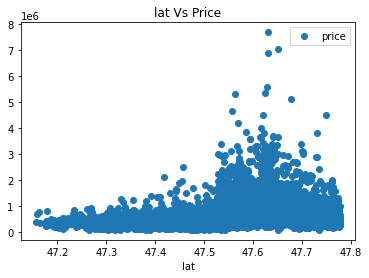

In [15]:
df_house.plot(x='lat',y='price',style = 'o')
plt.title('lat Vs Price')

# Simple Regression Model
In a simple regression model, only a single explanatory variable is used to predict the value of response variable. In this case, the response variable is 'price' while explanatory variable would be 'sqft_living' as this variable had the highest positive correlation with price.

### Training and Test Dataset
The dataset will be split into a training and test dataset. The training dataset will be used to fit the model i.e. it will find the estimated parameters of the model while the test dataset will be used for predicting the value of price. 

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_house, test_size=0.20)

In [17]:
train.shape

(17290, 19)

In [18]:
test.shape

(4323, 19)

### Attributes and Labels

In [19]:
X_train_simple = train['sqft_living'].values.reshape(-1,1)
X_test_simple = test['sqft_living'].values.reshape(-1,1)

y_train_simple = train['price'].values.reshape(-1,1)
y_test_simple = test['price'].values.reshape(-1,1)

### Fitting A Simple Regression Model

In [20]:
model_s = LinearRegression()
model_s.fit(X_train_simple,y_train_simple)

print('Intercept: ', model_s.intercept_)

print('Sqft_living Coefficient: ', model_s.coef_)

Intercept:  [-39105.03002828]
Sqft_living Coefficient:  [[278.34148807]]


### Predictions - Simple Regression

In [21]:
# Making Predictions
pred_simple = model_s.predict(X_test_simple)
pred_simple

array([[ 475826.72289982],
       [ 342222.80862658],
       [1077044.33712939],
       ...,
       [ 929523.34845269],
       [ 409024.7657632 ],
       [ 459126.23361567]])

### Residual Sum of Squares

In [22]:
# RSS
RSS_simple = np.sum((y_test_simple - pred_simple)**2)
print("RSS_simple: ", RSS_simple)

RSS_simple:  310450943260808.75


### Plotting line of Best Fit

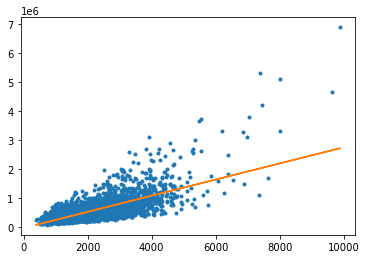

In [23]:
plt.plot(test['sqft_living'],test['price'],'.',
        test['sqft_living'], pred_simple,'-')

### Residual Plot

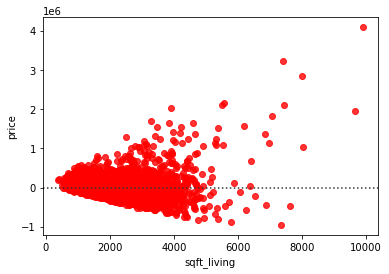

In [24]:
sns.residplot('sqft_living','price', data = test, color = 'red')

### Covariance


In [25]:
cov = pd.DataFrame.cov(df_house[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 
                                 'sqft_basement','waterfront','floors']])
print(cov)



                 sqft_living       grade     sqft_above  sqft_living15  \
sqft_living    843533.681368  823.407664  666697.840118  476160.051094   
grade             823.407664    1.381703     735.805403     574.590703   
sqft_above     666697.840118  735.805403  685734.667269  415384.954320   
sqft_living15  476160.051094  574.590703  415384.954320  469761.239945   
bathrooms         533.811988    0.602005     437.087555     300.161076   
view              200.314304    0.226383     106.387032     147.294289   
bedrooms          492.596040    0.390254     367.836092     249.651804   
sqft_basement  176835.841250   87.602262  -19036.827151   60775.096774   
waterfront          8.249461    0.008418       5.163720       5.127103   
floors            175.540402    0.290824     234.260251     103.586570   

                bathrooms        view    bedrooms  sqft_basement  waterfront  \
sqft_living    533.811988  200.314304  492.596040  176835.841250    8.249461   
grade            0.602005

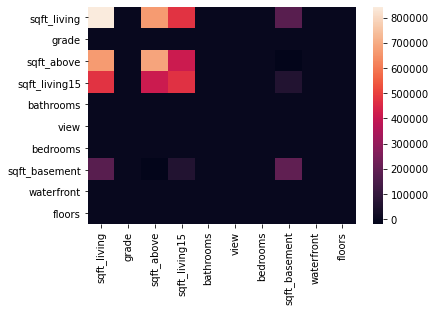

In [26]:
sns.heatmap(cov,fmt='g')
plt.show()

From the above covariance matrix, we can see that the variables ('sqft_living','sqft_above', 'sqft_living15') have a strong relationship with one another.

# Multiple Regression Model

We will build 3 multiple regression models by adding and removing different variables to see their affect on RSS. This will be done by using the built-in library in python i.e. scikit learn.

The training and testing datasets defined above will be used in this model.

### Model 1
In this model, we will take all the variables ('sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms') which were highly corelated to the variable 'price' in our model. 


In [27]:
# Separating Attributes and Labels
X_train = train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms']].values
X_test = test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms']].values
y_train = train['price'].values.reshape(-1,1)
y_test = test['price'].values.reshape(-1,1)

In [28]:
# Fitting Regression Model
model1 = LinearRegression()
model1.fit(X_train,y_train)

print('Intercept: ', model1.intercept_)

print('Coefficients: ', model1.coef_)

df1 = pd.DataFrame(model1.coef_, columns = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
                                            'bedrooms'])
print(df1)

Intercept:  [-497445.06925508]
Coefficients:  [[ 2.27326846e+02  1.00627831e+05 -4.53219179e+01  6.22923317e+00
  -2.70824090e+04  8.55372669e+04 -2.95231921e+04]]
   sqft_living          grade  sqft_above  sqft_living15     bathrooms  \
0   227.326846  100627.831159  -45.321918       6.229233 -27082.409006   

          view      bedrooms  
0  85537.26688 -29523.192058  


The value of the coefficients, for e.g. sqft_living, represents the predicted change in the value of price per unit change in the value of square feet.

In [29]:
# Making the predictions od model 1
pred1 = model1.predict(X_test)
pred1

array([[ 666035.24003656],
       [ 368603.28107262],
       [1050009.77174982],
       ...,
       [ 759241.2893885 ],
       [ 354167.19631622],
       [ 410382.82471901]])

In [30]:
# RSS of model 1
RSS_1 = np.sum((y_test - pred1)**2)
print("RSS_1: ", RSS_1)

RSS_1:  257419168591034.44


### Model 2
In model 2 we will add the variables  ('sqft_basement', 'lat') as they are correlated with "price".

In [31]:
# Separating Attributes and Labels
X_train = train[['sqft_living', 'grade', 'bathrooms', 'view', 'bedrooms', 'sqft_above', 'sqft_living15','sqft_basement'
                 ,'lat']].values
X_test = test[['sqft_living', 'grade', 'bathrooms', 'view', 'bedrooms','sqft_above', 'sqft_living15','sqft_basement'
              ,'lat']].values

y_train = train['price'].values.reshape(-1,1)
y_test = test['price'].values.reshape(-1,1)

In [32]:
# Fitting a Regression Model 2
model2 = LinearRegression()
model2.fit(X_train,y_train)

print('Intercept: ', model2.intercept_)

print('Coefficients: ', model2.coef_)

df2 = pd.DataFrame(model2.coef_, columns = ['sqft_living', 'grade', 'bathrooms', 'view', 'bedrooms', 
                                           'sqft_above', 'sqft_living15','sqft_basement','lat'])
print(df2)

Intercept:  [-31765907.0381027]
Coefficients:  [[ 1.32774540e+02  8.04433835e+04 -1.78565799e+04  9.08707517e+04
  -2.62655922e+04  6.03651483e+01  8.37862508e+00  7.24093919e+01
   6.59657002e+05]]
   sqft_living         grade     bathrooms          view      bedrooms  \
0    132.77454  80443.383546 -17856.579897  90870.751701 -26265.592224   

   sqft_above  sqft_living15  sqft_basement            lat  
0   60.365148       8.378625      72.409392  659657.002283  


In [33]:
# Making Predictions of Model 2
pred2 = model2.predict(X_test)
pred2

array([[ 759293.55937986],
       [ 424731.50261011],
       [1103259.34298122],
       ...,
       [ 771733.85658318],
       [ 243971.04761321],
       [ 339898.2957295 ]])

In [34]:
# RSS of model 2
RSS_2 = np.sum((y_test - pred2)**2)
print("RSS_2: ", np.sum((y_test - pred2)**2))

RSS_2:  221648078258775.9


### Model 3
In this model, we will remove the variables ('sqft_above', 'sqft_living15','sqft_basement') as they are strongly related to the variable sqft_living.








In [35]:
# Separating Attributes and Labels
X_train = train[['sqft_living', 'grade', 'bathrooms', 'bedrooms','view','lat']].values
X_test = test[['sqft_living', 'grade', 'bathrooms', 'bedrooms','view','lat']].values


In [36]:
# Fiting a Regression Model
model3 = LinearRegression()
model3.fit(X_train,y_train)

print('Intercept: ', model3.intercept_)

print('Coefficients: ', model3.coef_)

df3 = pd.DataFrame(model3.coef_, columns = ['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'view','lat'])
print(df3)

Intercept:  [-31938705.4155272]
Coefficients:  [[ 2.00367906e+02  8.02197464e+04 -1.84923096e+04 -2.59873505e+04
   9.25444307e+04  6.63433847e+05]]
   sqft_living        grade    bathrooms      bedrooms          view  \
0   200.367906  80219.74636 -18492.30965 -25987.350487  92544.430735   

             lat  
0  663433.847397  


In [37]:
# Predicting the value
pred3 = model3.predict(X_test)
pred3

array([[ 762152.40206636],
       [ 422327.21627709],
       [1102429.81230509],
       ...,
       [ 767941.23193196],
       [ 245307.2413126 ],
       [ 335930.44783058]])

In [38]:
# RSS
RSS_3 = np.sum((y_test - pred3)**2)
print("RSS_3: ", np.sum((y_test - pred3)**2))

RSS_3:  221496650491820.8


As we can see, adding or removing variables may result in the Residual Sum of Squares to rise.

In [39]:
RSS = pd.DataFrame(np.array([[RSS_1,RSS_2,RSS_3]]),columns = ['RSS_1','RSS_2','RSS_3'])
print(RSS)

          RSS_1         RSS_2         RSS_3
0  2.574192e+14  2.216481e+14  2.214967e+14


# Gradient Descent

In a simple regression model, we try to estimate the value of the response variable (house price) from a single explanatory varibale which in this case is "sqft_living" by fitting a line that best fits our model. 

But how do we measure the quality or performance of our model? 

This is done by defining a cost function such as Residual Sum of Squares (RSS) in terms of our estimated parameters (w0, w1) where w0 is the intercept and w1 is the coefficeint of 'sqft_living'. Therefore, our main goal in fitting a model is to minimize cost function, RSS(w0,w1),  over all possible values of (w0, w1) i.e. search over the space of all possible lines and find the line that minimize the RSS.

Gradient Descent is an optimization technique in Machine Learning that allow us to find specific values of w0 and w1 which minimizes our RSS. 

To understand this in more detail, we can try to find the minimum and maximum of the cost function analyticaly. For example, in order to find the minimum of a convex function, we will compute the derivative of that function and equate it to 0. However, this could become computationaly intensive if there are more than 1 variables. 



A better approach would then be to use hill climbing or descent technique for finding the maximum or minimum respectively. Instead of equating the derivative to 0, we move along the curve from one point to another by updating the value or vector of the estimated parameter W (or weights of the given input features). This is done through an iterative process by defining a stepsize and convergence criteria. 

First, we assume an initial value of our estimated parameters (w,regression coefficients) and compute the derivative of the cost function (RSS) at that point. Then at each iteration the previous value of w is either increased or decreased by the amount based on the derivative as determined by the stepsize (Instead of the derivative, the value is increased or decresed by the amount of stepsize). 

In case of min, if the value of the derivative is -ve, increase the value of w. If the value of the derivative is +ve, decrease the value of w.

Laslty, how do we assess the convergence? The algorithm will not converge until the magnitude of the derivative is less than the tolerance level i.e. threshold 'e', which will be a very small number. The threshold will be set by us and the algorithm will not terminate until the condition is satisfied.


## Simple Regression - Gradient Descent
To understand Gradient Descent, let's start with simple regression by taking a single input feature 'sqft_living' from the housing dataset.

The following function takes data, input features, output and returns a feature_matrix which will consist a first column of ones and then the value of input features in the order defined. It also returns an output 'price' of the dataset. 


### Input and Output

In [40]:
def get_data(data,features, output):
    data['constant'] = 1
    features = ['constant'] + features

    features_new = data[features]
    feature_matrix = np.asarray(features_new)
    
    output_data = data[output]
    output_array = output_data.to_numpy()
    return(feature_matrix,output_array)

### Predictions

Then, we get the 1D array predictions by multiplying 2D rfeature_matrix with 1D regression weights which is a dot product between the two vectors. We will define the initial weights to be [-47000, 1]

In [41]:
def prediction(feature_matrix, weights):
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

### Derivative

Now we take the derivative of the cost function. A derivative function is then defined which takes feature and error array and returns a number. 

In [42]:
def feature_derivative(errors,feature):
    derivative = 2*(np.dot(errors,feature))
    return(derivative)

### Gradient Descent Algorithm


In [43]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights)
    while not converged:
        predictions = prediction(feature_matrix,weights)
        
        errors = predictions - output
        
        gradient_sum_squares = 0
        for i in range(len(weights)):
            derivative = feature_derivative(errors,feature_matrix[:,i])
            
            gradient_sum_squares = derivative**2 + gradient_sum_squares
            
            # subtract the step size times the derivative from the current weight
            weights = weights - step_size*(derivative)
            
            gradient_magnitude = sqrt(gradient_sum_squares)
            if gradient_magnitude < tolerance:
                converged = True
    return(weights)  

### Define Parameters

1. features
2. output
3. errors
4. tolerance
5. stepsize

In [44]:
(feature_matrix,output_array) = get_data(train, ['sqft_living'],'price')
initial_weights = np.array([-47000., 1.])
predictions = prediction(feature_matrix, initial_weights)
errors = output_array - predictions
step_size = 7e-12
tolerance = 2.5e7

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
weights = regression_gradient_descent(feature_matrix, output_array, initial_weights, step_size, tolerance)

In [46]:
print(weights)

[-46719.65976749    281.34023251]


### Residual Sum of Squares

In [47]:
# Using test data to compute RSS
(feature_matrix_test,output_array_test) = get_data(test, ['sqft_living'],'price')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
prediction_test = prediction(feature_matrix_test, weights)
errors = output_array_test - prediction_test
RSS_simple_GD = np.sum((errors)**2)
print("RSS_simple_GD: ", np.sum((errors)**2))

RSS_simple_GD:  310259649375469.4


In [56]:
print("RSS using Simple Regression: ", RSS_simple)


RSS using Simple Regression:  310450943260808.75


From above we can see that the RSS of Simple Regression using the optimization technique, Gradient Descent, is much lower than RSS of simple regression using a pyhton library.